<a href="https://colab.research.google.com/github/abdelazimanwar/supermarket-sales-analysis/blob/main/Analysis_of_Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project focuses on analyzing sales data from a supermarket chain in order to gain insights into customer purchasing behavior, product performance, and overall business trends.

The dataset contains transactional data including:
*   Invoice details (Invoice ID, Date, Time)
*   Customer information (Gender, Membership status)
*   Products sold (Product line, Quantity, Unit price)
*   Financial metrics (Total amount, Tax, Payment method)

The main objectives of this analysis are:
*   Understand overall sales performance.

*   Analyze product performance.

*   Customer insights.

*   Trend analysis.

# Data Gathering

In [74]:
# We import the libraries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# We import the Data Frame
sales = pd.read_excel('/content/Capstone Data - Supermarket Sales.xlsx')

# Data Assessment

In [76]:
# We show a sample of Data Frame
sales.sample(5)

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
291,558-80-4082,C,0,1,0,Normal,Male,Electronic accessories,27.85,7,9.7475,204.6975,2019-03-14,17:20:00,Ewallet,6.0
416,750-57-9686,C,0,1,0,Normal,Female,Home and lifestyle,45.38,4,9.0760,190.5960,2019-01-08,13:48:00,Credit card,8.7
695,800-09-8606,A,1,0,0,Member,Female,Home and lifestyle,87.37,5,21.8425,458.6925,2019-01-29,19:45:00,Cash,6.6
376,843-01-4703,B,0,0,1,Member,Female,Home and lifestyle,35.38,9,15.9210,334.3410,2019-01-05,19:50:00,Credit card,9.6
186,305-14-0245,B,0,0,1,Member,Female,Home and lifestyle,94.49,8,37.7960,793.7160,2019-03-03,19:00:00,Ewallet,7.5


In [77]:
sales.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,2019-01-05,13:08:00,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,2019-01-27,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,5.3


In [78]:
# We check the consistency of "Time" column
sales[sales['Time'].str.endswith('PM', na=False)]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.048,2019-01-27,8 - 30 PM,Ewallet,8.4


In [79]:
# We show the dimensions of the Data Farame and know Nulls
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1006 non-null   object        
 1   Branch         1006 non-null   object        
 2   Yangon         1006 non-null   int64         
 3   Naypyitaw      1006 non-null   int64         
 4   Mandalay       1006 non-null   int64         
 5   Customer type  1006 non-null   object        
 6   Gender         1006 non-null   object        
 7   Product line   1006 non-null   object        
 8   Unit price     1006 non-null   object        
 9   Quantity       1006 non-null   int64         
 10  Tax 5%         997 non-null    float64       
 11  Total          1003 non-null   float64       
 12  Date           1006 non-null   datetime64[ns]
 13  Time           1006 non-null   object        
 14  Payment        1006 non-null   object        
 15  Rating         1006 n

In [80]:
# We show the nulls in Tax 5% column
sales[sales['Tax 5%'].isnull()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,2019-01-27,8 - 30 PM,Ewallet,8.4
8,665-32-9167,A,1,0,0,Normal,Male,Health and beauty,36.26,2,NaN,76.1460,2019-01-10,17:15:00,Credit card,7.2
86,362-58-8315,C,0,1,0,Normal,Male,Fashion accessories,76.52,5,NaN,401.7300,2019-03-25,10:23:00,Cash,9.9
92,873-51-0671,A,1,0,0,Member,Female,Sports and travel,21.98,7,NaN,161.5530,2019-01-10,16:42:00,Ewallet,5.1
97,871-39-9221,C,0,1,0,Normal,Female,Electronic accessories,12.45 USD,6,NaN,78.4350,2019-02-09,13:11:00,Cash,4.1
629,308-39-1707,A,1,0,0,Normal,Female,Fashion accessories,12.09 USD,-1,NaN,12.6945,2019-01-26,18:19:00,Credit card,8.2
830,237-44-6163,A,1,0,0,Normal,Male,Electronic accessories,10.56 USD,-8,NaN,88.7040,2019-01-24,17:43:00,Cash,7.6
881,115-38-7388,C,0,1,0,Member,Female,Fashion accessories,10.18 USD,-8,NaN,85.5120,2019-03-30,12:51:00,Credit card,9.5
903,865-41-9075,A,1,0,0,Normal,Male,Food and beverages,11.53 USD,-7,NaN,84.7455,2019-01-28,17:35:00,Cash,8.1


In [81]:
# We show the nulls in Total column
sales[sales['Total'].isnull()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,2019-01-05,13:08:00,Ewallet,9.1
14,829-34-3910,A,1,0,0,Normal,Male,Health and beauty,71.38,10,35.6900,NaN,2019-03-29,19:21:00,Cash,5.7
37,272-65-1806,A,1,0,0,Normal,Male,Electronic accessories,60.88,9,27.3960,NaN,2019-01-15,17:17:00,Ewallet,4.7


In [82]:
# We check the consistency issue of unit price column
sales[sales['Unit price'].str.endswith('USD', na=False)]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
97,871-39-9221,C,0,1,0,Normal,Female,Electronic accessories,12.45 USD,6,NaN,78.4350,2019-02-09,13:11:00,Cash,4.1
629,308-39-1707,A,1,0,0,Normal,Female,Fashion accessories,12.09 USD,-1,NaN,12.6945,2019-01-26,18:19:00,Credit card,8.2
830,237-44-6163,A,1,0,0,Normal,Male,Electronic accessories,10.56 USD,-8,NaN,88.7040,2019-01-24,17:43:00,Cash,7.6
881,115-38-7388,C,0,1,0,Member,Female,Fashion accessories,10.18 USD,-8,NaN,85.5120,2019-03-30,12:51:00,Credit card,9.5
903,865-41-9075,A,1,0,0,Normal,Male,Food and beverages,11.53 USD,-7,NaN,84.7455,2019-01-28,17:35:00,Cash,8.1


In [83]:
# We check the invalid values in quantity column
sales[sales['Quantity']<=0]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
629,308-39-1707,A,1,0,0,Normal,Female,Fashion accessories,12.09 USD,-1,NaN,12.6945,2019-01-26,18:19:00,Credit card,8.2
830,237-44-6163,A,1,0,0,Normal,Male,Electronic accessories,10.56 USD,-8,NaN,88.7040,2019-01-24,17:43:00,Cash,7.6
881,115-38-7388,C,0,1,0,Member,Female,Fashion accessories,10.18 USD,-8,NaN,85.5120,2019-03-30,12:51:00,Credit card,9.5
903,865-41-9075,A,1,0,0,Normal,Male,Food and beverages,11.53 USD,-7,NaN,84.7455,2019-01-28,17:35:00,Cash,8.1


In [84]:
# We show some descriptive statistics of the numerical columns
sales.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Date,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,2019-02-14 00:22:54.155069440,7.056163
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,2019-01-01 00:00:00,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,2019-01-24 00:00:00,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,2019-02-13 00:00:00,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,2019-03-08 00:00:00,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,97.000000
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,NaN,3.318751


In [85]:
# We show some descriptive statistics of the objective columns
sales.describe(include=[object])

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Time,Payment
count,1006,1006,1006,1006,1006,1006.00,1006,1006
unique,1000,3,4,2,6,943.00,506,3
top,210-67-5886,A,Normal,Male,Fashion accessories,83.77,19:48:00,Ewallet
freq,2,341,515,525,179,3.00,7,347


In [86]:
# We check duplicated values for Invoice ID (That must be unique and not null)
sales[sales.duplicated(subset=['Invoice ID'], keep=False)]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
108,588-01-7461,C,0,1,0,Normal,Female,Food and beverages,33.98,9,15.2910,321.1110,2019-03-24,10:43:00,Cash,4.2
109,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,2019-03-03,14:30:00,Cash,9.2
110,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2019-02-05,11:32:00,Ewallet,4.6
111,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-02-05,10:41:00,Credit card,7.8
112,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2019-02-15,12:44:00,Cash,8.4
113,645-44-1170,A,1,0,0,Member,Male,Home and lifestyle,58.07,9,26.1315,548.7615,2019-01-19,20:07:00,Ewallet,4.3
1000,588-01-7461,C,0,1,0,Normal,Female,Food and beverages,33.98,9,15.2910,321.1110,2019-03-24,10:43:00,Cash,4.2
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,2019-03-03,14:30:00,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2019-02-05,11:32:00,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-02-05,10:41:00,Credit card,7.8


In [87]:
print(sales.value_counts('Customer type'))

Customer type
Normal     515
Member     463
-           27
Memberr      1
Name: count, dtype: int64


In [88]:
print(sales.value_counts('Product line'))

Product line
Fashion accessories       179
Food and beverages        175
Electronic accessories    171
Sports and travel         167
Home and lifestyle        161
Health and beauty         153
Name: count, dtype: int64


In [89]:
print(sales.value_counts('Payment'))

Payment
Cash           347
Ewallet        347
Credit card    312
Name: count, dtype: int64


In [90]:
print(sales['Unit price'].dtypes)

object


In [91]:
# We check the outlier of Rating (The Maximum value = 97 !)
sales[sales['Rating']>10]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
157,307-85-2293,B,0,0,1,Normal,Male,Home and lifestyle,50.28,5,12.57,263.97,2019-03-07,13:58:00,Ewallet,97.0


## Quality Issues

*   "Time" column has (1) record is inconsistent with others

*   "Tax 5%" column has (9) nulls

*   "Total" column has (3) nulls

*   "Unit price" column has (5) records are inconsistent with other records

*   "Quantity" column has (4) records are invalid (Negative values instead of Positive values)

*   "Invoice ID" column has (6) duplicated records

*   "Customer type" column has (1) record is inconsistent (His value is 'Memberr' instead of 'Member')

*   "Unit Price" column his (Data Type) is object instead of float

*   "Rating" column has an outlier (The Maximum value = 97)!



## Tidiness Issues

*   Yangon, Naypyitaw, and Mandalay are cities in Myanmar, but they were recorded as variables




# Data Cleaning

In [92]:
# We Take a copy to do the adjustments on it
sales_clean = sales.copy()

## The Solution Sequence of Quality Issues

Issue 1: "Unit price" column has (5) records are inconsistent with other records

Issue 2: "Unit Price" column his (Data Type) is object instead of float

Issue 3: "Quantity" column has (4) records are invalid (Negative values instead of Positive values)

Issue 4: "Total" column has (3) nulls

Issue 5: "Tax 5%" column has (9) nulls

Issue 6: "Invoice ID" column has (6) duplicated records

Issue 7: "Customer type" column has (1) record is inconsistent (His value is 'Memberr' instead of 'Member')

Issue 8: "Rating" column has an outlier (The Maximum value = 97)!

Issue 9: "Time" column has (1) record is inconsistent with others


### Issue 1: "Unit price" column has (5) records are inconsistent with other records

Define: We will adjust these records to be consistent with other records

In [93]:
# Code

# We get ride of the part that cause the issue
price_USD = sales_clean['Unit price'].str.endswith('USD', na=False)
sales_clean.loc[price_USD, 'Unit price'] = (
    sales_clean.loc[price_USD, 'Unit price']
    .str.replace('USD', '', regex=False))

In [94]:
# Test

sales_clean[sales_clean['Unit price'].str.endswith('USD', na=False)]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


### Issue 2: "Unit Price" column his (Data Type) is object instead of float

Define: We will adjust the Data Type of Unit price column using (.astype() method)

In [95]:
# Code

sales_clean['Unit price'] = sales_clean['Unit price'].astype(float)

In [96]:
# Test

sales_clean['Unit price'].dtypes

dtype('float64')

### Issue 3: "Quantity" column has (4) records are invalid (Negative values instead of Positive values)

Define: We will replace the Negative value with the Positive value

In [97]:
# Code

sales_clean.loc[sales_clean['Quantity']<1, 'Quantity'] = sales_clean.loc[sales_clean['Quantity']<1, 'Quantity'] * -1

In [98]:
# Test

sales_clean[sales_clean['Quantity']<1]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


### Issue 4: "Total" column has (3) nulls

Define: We will calculate every NaN cell using the formula (Total = 1.05 * (Unit Price * Quantity))

In [99]:
# Code

sales_clean['Total'] = 1.05 * (sales_clean['Unit price'] * sales_clean['Quantity'])

In [100]:
# Test
sales_clean[sales_clean['Total'].isnull()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


### Issue 5: "Tax 5%" column has (9) nulls

Define: We will calculate every NaN cell using the formula (Tax 5% = Total - (Unit Price * Quantity))

In [101]:
# Code

sales_clean['Tax 5%'] = sales_clean['Total'] - (sales_clean['Unit price']*sales_clean['Quantity'])

In [102]:
# Test

sales_clean[sales_clean['Tax 5%'].isnull()]


,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


### Issue 6: "Invoice ID" column has (6) duplicated records

Define: We will get ride of duplicats records to make it "Unique"

In [103]:
# Code

sales_clean = sales_clean.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [104]:
# Test

sales_clean[sales_clean.duplicated(subset=['Invoice ID'], keep=False)]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


### Issue 7: "Customer type" column has (1) record is inconsistent (His value is 'Memberr' instead of 'Member')

Define: We will change this cell by 'Member'

In [105]:
# Code

Customer_rr = sales_clean['Customer type'] == 'Memberr'
sales_clean.loc[Customer_rr, 'Customer type'] = (
    sales_clean.loc[Customer_rr, 'Customer type']
    .str.replace('Memberr', 'Member', regex=False))

In [106]:
# Test

sales_clean['Customer type'].value_counts()

,count
Customer type,
Normal,513
Member,460
-,27


### Issue 8: "Rating" column has an outlier (The Maximum value = 97)!

Define: We will replace this value with the 'Mean' value


In [107]:
# Code

Rating_mean = sales_clean['Rating'].mean()

sales_clean.loc[sales_clean['Rating'] > 10, 'Rating'] = Rating_mean


In [108]:
# Test

sales_clean[sales_clean['Rating'] > 10]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


### Issue 9: "Time" column has (1) record is inconsistent with others

Define: We will replace this value (8-30 PM) with the correct value (20:30:00)

In [109]:
# Code

time_pm = sales_clean['Time'].str.endswith('PM', na=False)
sales_clean.loc[time_pm, 'Time'] = (sales_clean.loc[time_pm, 'Time'].
                                    str.replace('8 - 30 PM','20:30:00',regex=False))


In [110]:
# Test

sales_clean[sales_clean['Time'].str.endswith('PM', na=False)]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


## The Solution of Tidiness Issues

Issue: Yangon, Naypyitaw, and Mandalay are cities in Myanmar, but they were recorded as column headers. The value 1 indicates the city for each Invoice ID.

Define:
We will reshape the dataset by melting the city columns (Yangon, Naypyitaw, Mandalay) into a single column named City. Then, we will filter to keep only the rows where the value is 1, which indicates the correct city for each invoice. This will produce a tidy dataset where each Invoice ID has one corresponding City value.

In [111]:
# Code
# We will reshape the dataset by melting the city columns (Yangon, Naypyitaw, Mandalay) into a single column named City
id_varibles = sales_clean[['Invoice ID','Branch',	'Customer type',	'Gender',	'Product line',	'Unit price',
                           'Quantity'	,'Tax 5%',	'Total',	'Date'	,'Time',	'Payment',	'Rating']]

sales_clean = sales_clean.melt(id_vars = id_varibles, value_vars=['Yangon',	'Naypyitaw',	'Mandalay'],
                               var_name='City', value_name='IsCity', ignore_index=False)

In [112]:
# We will filter to keep only the rows where the value is 1, which indicates the correct city for each invoice
sales_clean = sales_clean[sales_clean['IsCity'] == 1]

In [113]:
# We will remove IsCity column because we don't need it from now on
sales_clean = sales_clean.drop(columns='IsCity')

In [114]:
# Test

sales_clean.sample(5)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City
791,400-80-4065,C,Member,Male,Health and beauty,68.55,4,13.7100,287.9100,2019-02-15,20:21:00,Credit card,9.2,Naypyitaw
264,154-74-7179,B,Normal,Male,Sports and travel,54.45,1,2.7225,57.1725,2019-02-26,19:24:00,Ewallet,7.9,Mandalay
321,622-20-1945,C,Normal,Female,Health and beauty,39.42,1,1.9710,41.3910,2019-01-18,15:08:00,Cash,8.4,Naypyitaw
999,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28:00,Cash,6.6,Yangon
16,656-95-9349,A,Normal,Male,Health and beauty,68.93,7,24.1255,506.6355,2019-03-11,11:03:00,Credit card,4.6,Yangon


In [115]:
# We will reformat the secquence of indices of records

sales_clean = sales_clean.reset_index(drop=True)

In [116]:
# Test

sales_clean.head(5)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,City
0,750-67-8428,A,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,9.1,Yangon
1,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,7.4,Yangon
2,123-19-1176,A,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:30:00,Ewallet,8.4,Yangon
3,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,5.3,Yangon
4,355-53-5943,A,Normal,Male,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,5.8,Yangon


# Data Visualization

In [117]:
# Set a professional style & color palette
sns.set_theme(style="whitegrid", palette="Set2")

## Total Sales, Average Sales and Total Quantity

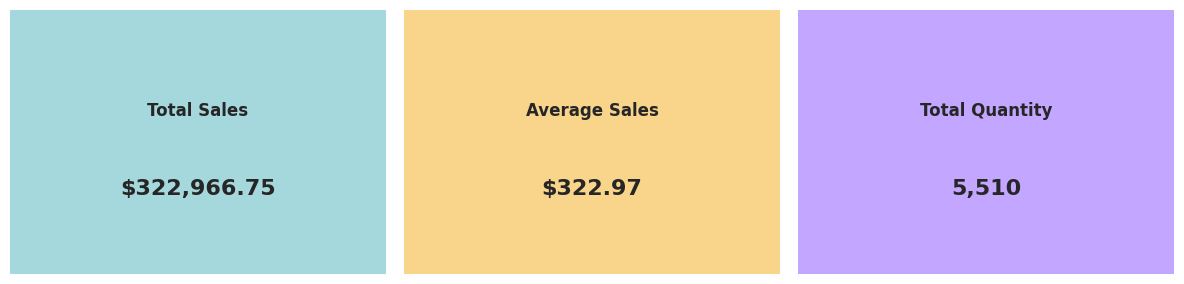

In [118]:
total_sales = sales_clean['Total'].sum()
avg_sales = sales_clean['Total'].mean()
total_quantity = sales_clean['Quantity'].sum()

card_colors = ["#A5D8DD", "#F9D48B", "#C3A6FF"]

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Total Sales
axes[0].set_facecolor(card_colors[0])
axes[0].text(0.5, 0.6, "Total Sales", fontsize=12, fontweight='bold', ha='center')
axes[0].text(0.5, 0.3, f"${total_sales:,.2f}", fontsize=16, fontweight='bold', ha='center')
axes[0].set_xticks([]); axes[0].set_yticks([]); axes[0].spines[:].set_visible(False)

# Average Sales
axes[1].set_facecolor(card_colors[1])
axes[1].text(0.5, 0.6, "Average Sales", fontsize=12, fontweight='bold', ha='center')
axes[1].text(0.5, 0.3, f"${avg_sales:,.2f}", fontsize=16, fontweight='bold', ha='center')
axes[1].set_xticks([]); axes[1].set_yticks([]); axes[1].spines[:].set_visible(False)

# Total Quantity
axes[2].set_facecolor(card_colors[2])
axes[2].text(0.5, 0.6, "Total Quantity", fontsize=12, fontweight='bold', ha='center')
axes[2].text(0.5, 0.3, f"{total_quantity:,}", fontsize=16, fontweight='bold', ha='center')
axes[2].set_xticks([]); axes[2].set_yticks([]); axes[2].spines[:].set_visible(False)

plt.tight_layout()
plt.show()

## Total Sales by Branch

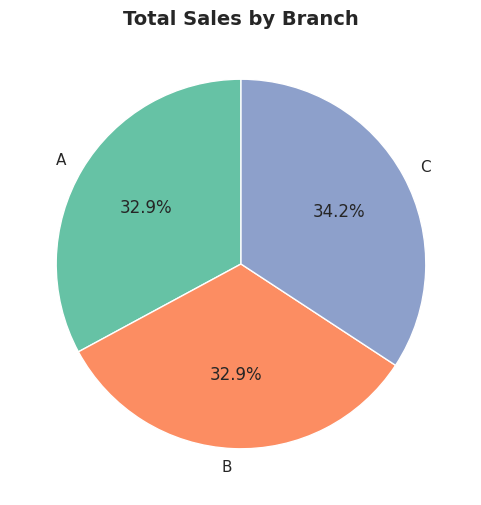

In [119]:
branch_total = sales_clean.groupby('Branch')['Total'].sum()
plt.figure(figsize=(6, 6))
plt.pie(branch_total, labels=branch_total.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("Set2", len(branch_total)))
plt.title('Total Sales by Branch', fontsize=14, fontweight='bold')
plt.show()

## Total Sales by City

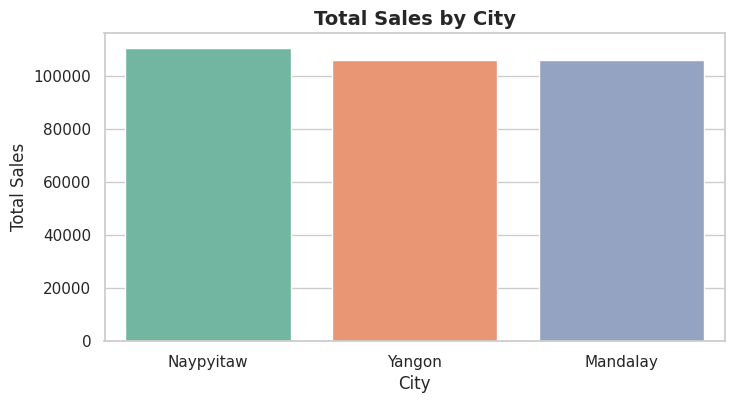

In [120]:
city_total = sales_clean.groupby('City')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=city_total.index,
            y=city_total.values,
            hue=city_total.index,
            palette="Set2",
            dodge=False,
            legend=False)
plt.title('Total Sales by City', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.show()

## Sales Trend over Time

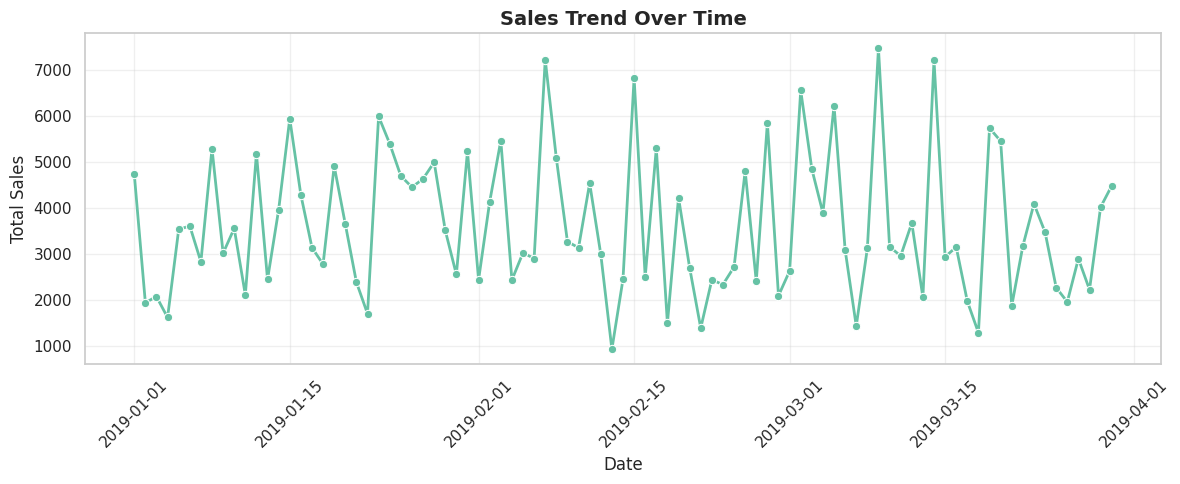

In [121]:
date_total = sales_clean.groupby('Date')['Total'].sum().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=date_total.index, y=date_total.values, marker='o', linewidth=2, color=sns.color_palette("Set2")[0])
plt.title('Sales Trend Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Product Line Performance

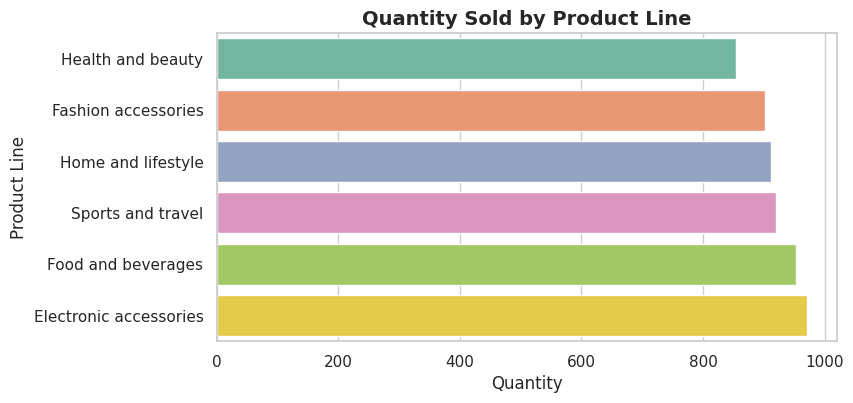

In [122]:
product_quantity = sales_clean.groupby('Product line')['Quantity'].sum().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(
    x=product_quantity.values,
    y=product_quantity.index,
    hue=product_quantity.index,
    palette="Set2",
    dodge=False,
    legend=False
)
plt.title('Quantity Sold by Product Line', fontsize=14, fontweight='bold')
plt.xlabel('Quantity')
plt.ylabel('Product Line')
plt.show()

## Average Rating per Product Line

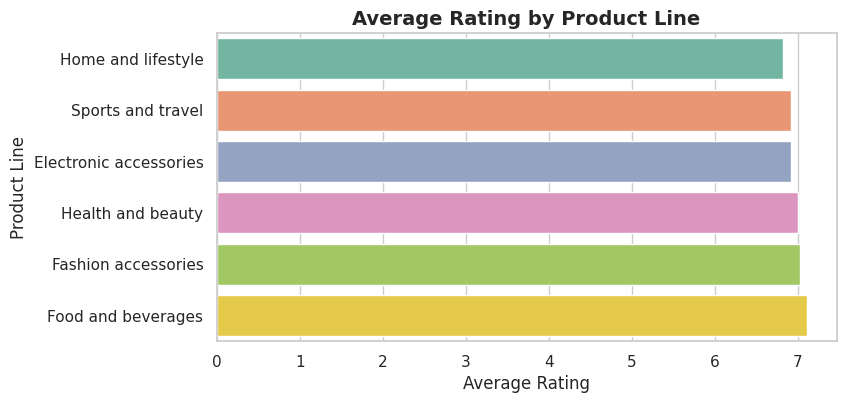

In [123]:
product_rating = sales_clean.groupby('Product line')['Rating'].mean().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(x=product_rating.values,
            y=product_rating.index,
            hue=product_rating.index,
            palette="Set2",
            dodge=False,
            legend=False)
plt.title('Average Rating by Product Line', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.show()


## Payment Method Distribution

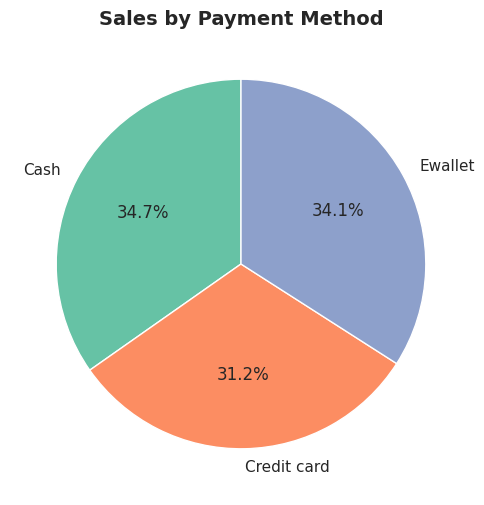

In [124]:
payment_total = sales_clean.groupby('Payment')['Total'].sum()
plt.figure(figsize=(6, 6))
plt.pie(payment_total, labels=payment_total.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("Set2", len(payment_total)))
plt.title('Sales by Payment Method', fontsize=14, fontweight='bold')
plt.show()


## Customer Type Contribution

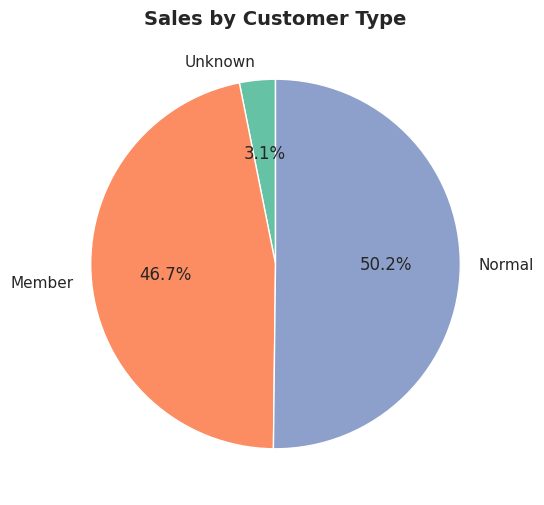

In [125]:
customer_total = sales_clean.groupby('Customer type')['Total'].sum()

# Modify labels (replace "-" with "Unknown")
labels = customer_total.index.tolist()
labels = ['Unknown' if lbl == '-' else lbl for lbl in labels]

plt.figure(figsize=(6, 6))
plt.pie(customer_total, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("Set2", len(customer_total)))
plt.title('Sales by Customer Type', fontsize=14, fontweight='bold')
plt.show()

# Recommendations

##  Boost Membership Enrollment

Why: Almost half of sales come from Members so increasing memberships will boost loyalty and stabilize sales.

Actions:

* Improve the loyalty program (exclusive discounts, higher cashback, early access to sales).

* Actively promote membership to Normal customers at checkout and train staff to explain benefits clearly.

## Target Normal Customers

Why: They are the largest customer segment and can be converted to Members.

Actions:

* Launch marketing campaigns or special offers to increase their spending.

   Example: “Join today and get 15% off your next purchase.”

## Use High Product Ratings in Marketing

Why: All product lines have very high ratings (close to 7.0) and this is strong selling point.

Actions:

* Highlight these ratings in ads and marketing campaigns to build trust.

*  Focus especially on top-selling product lines.

## Ensure Stock for Top Sellers

Why: Electronic Accessories and Food & Beverages have the highest sales so must always be in stock.

Actions:

* Strengthen inventory management and monitor supply chain to avoid stockouts.

## Cross-Promote Lower-Selling Items

Why: Some categories (Health & Beauty) sell slightly less.

Actions:

* Bundle them with high-selling products.

  Example: “Buy a Food & Beverages item and get a discount on Health & Beauty.”

## Streamline Payment Options

Why: Cash, E-wallet, and Credit Card usage are nearly equal so any issue will impact many customers.

Actions:

* Keep all payment systems reliable and fast.

* Consider a small incentive for digital payments to reduce cash handling and improve data tracking.

## Share Best Practices Between Branches

Why: Sales are similar across branches so small improvements can increase performance.

Actions:

* Identify what Branch C is doing well and replicate those strategies in Branches A and B.

## Investigate Sales Peaks

Why: There are big spikes in sales on certain days.

Actions:

* Analyze which events or promotions caused the spikes and repeat them more often.

## Reduce Low-Sales Dips

Why: Some days have very low sales.

Actions:

* Run special offers on slow days (weekday or off-peak hour promotions) to smooth out the sales trend.